In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [247]:
# Load the restaurant data
csv_file = os.path.join("resources", "restaurant_data.csv")

restaurant_df = pd.read_csv(csv_file, encoding = 'utf-8')
restaurant_df.head(10)

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
5,Restaurant 5,Downtown,Indian,4.4,79,35.69,6787,75378,5,400,247.544461,2.0,8.5,Yes,27,22,644220.90
6,Restaurant 6,Rural,Mexican,4.9,49,35.30,2594,32587,11,106,206.159035,1.5,5.3,No,12,28,400348.65
7,Restaurant 7,Suburban,Japanese,4.1,61,73.65,3213,33429,14,377,135.319312,1.8,4.6,No,56,23,1014153.65
8,Restaurant 8,Rural,Japanese,4.2,37,73.75,3437,37102,18,494,55.652417,7.1,9.4,Yes,27,24,635606.10
9,Restaurant 9,Rural,French,5.0,32,59.80,2569,28419,18,907,273.944887,6.4,7.4,No,12,19,452920.65


In [248]:
# Check for missing data
restaurant_df.count()

Name                      8368
Location                  8368
Cuisine                   8368
Rating                    8368
Seating Capacity          8368
Average Meal Price        8368
Marketing Budget          8368
Social Media Followers    8368
Chef Experience Years     8368
Number of Reviews         8368
Avg Review Length         8368
Ambience Score            8368
Service Quality Score     8368
Parking Availability      8368
Weekend Reservations      8368
Weekday Reservations      8368
Revenue                   8368
dtype: int64

In [249]:
# Check data types
restaurant_df.dtypes

Name                       object
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability       object
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object

In [250]:
# Create a country list for x-axis
country_list = ["American", "French", "Indian", "Italian", "Japanese", "Mexican"]

1. Average "Revenue" comparison by each country's "Cuisine"

In [251]:
# Group with "Cuisine" by each countries with average "Revenue"
group0 = restaurant_df.groupby(["Cuisine"])
group0 = group0[["Revenue"]].mean()
group0

,Revenue
Cuisine,
American,564942.031518
French,820204.107132
Indian,496615.723944
Italian,692742.385796
Japanese,937969.038810
Mexican,427383.895621


In [252]:
# Create a "Revenue" list 
revenue = group0["Revenue"].tolist()
revenue

[564942.0315183615,
 820204.1071318911,
 496615.7239444851,
 692742.3857961784,
 937969.0388095239,
 427383.89562096196]

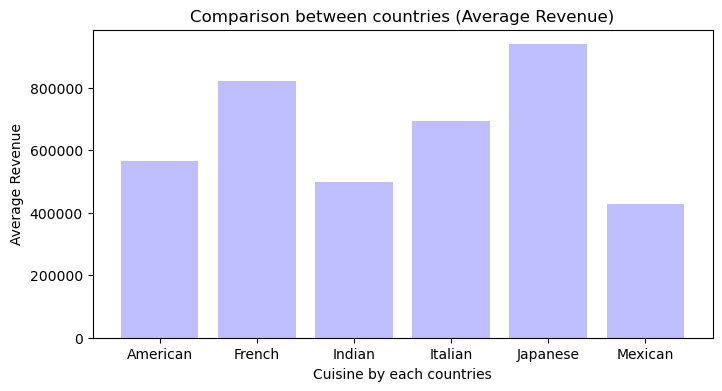

In [253]:
# Create a bar chart comparing average "Revenue" by each countries
plt.figure(figsize = (8, 4))
plt.bar(country_list, revenue, color = 'blue', alpha = 0.25)

plt.title("Comparison between countries (Average Revenue)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Revenue")

revenue_bar_path = os.path.join("result_country", "avg_revenue_bar_comparison.png")
plt.savefig(revenue_bar_path)

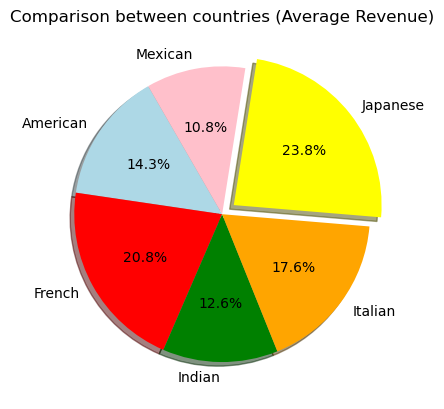

In [254]:
# Create a pie chart comparing average "Revenue" by each countries
country_list = ["American", "French", "Indian", "Italian", "Japanese", "Mexican"]
colors = ["lightblue", "red", "green", "orange", "yellow", "pink"]
explode = (0, 0, 0, 0, 0.1, 0)
figure = revenue

plt.pie(figure, labels = country_list, colors = colors, explode = explode, 
        shadow = True, autopct = '%.1f%%', startangle = 120)
plt.title("Comparison between countries (Average Revenue)")

revenue_pie_path = os.path.join("result_country", "avg_revenue_pie_comparison.png")
plt.savefig(revenue_pie_path)

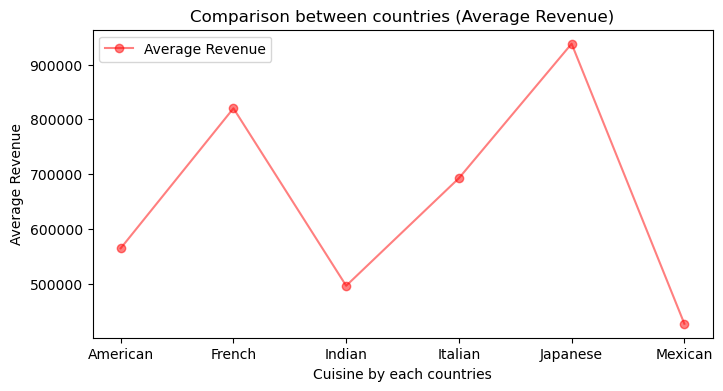

In [255]:
# Create a line graph comparing average "Revenue" by each countries
plt.figure(figsize = (8, 4))
plt.plot(country_list, revenue, marker = 'o', color = 'red', label = "Average Revenue", alpha = 0.5)

plt.title("Comparison between countries (Average Revenue)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Revenue")
plt.legend(loc = 'best')

revenue_line_path = os.path.join("result_country", "avg_revenue_line_comparison.png")
plt.savefig(revenue_line_path)

2. Average "Rating" by each country's "Cuisine"

In [256]:
# Group with "Cuisine" by each countries with average "Rating" scores
group1 = restaurant_df.groupby(["Cuisine"])
group1 = group1[["Rating"]].mean()
group1

,Rating
Cuisine,
American,3.992302
French,4.000977
Indian,4.012856
Italian,4.014650
Japanese,4.012574
Mexican,4.016798


In [257]:
# Create a "Rating" list
rating = group1["Rating"].tolist()
rating

[3.9923022598870057,
 4.0009769713886945,
 4.012856099342586,
 4.014649681528662,
 4.012574404761905,
 4.0167982770997845]

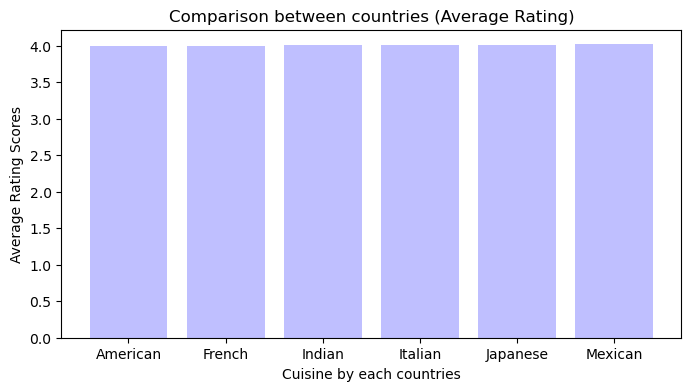

In [258]:
# Create a bar chart comparing average "Rating" by each countries
plt.figure(figsize = (8, 4))
plt.bar(country_list, rating, color = 'blue', alpha = 0.25)

plt.title("Comparison between countries (Average Rating)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Rating Scores")

rating_path = os.path.join("result_country", "avg_rating_bar_comparison.png")
plt.savefig(rating_path)

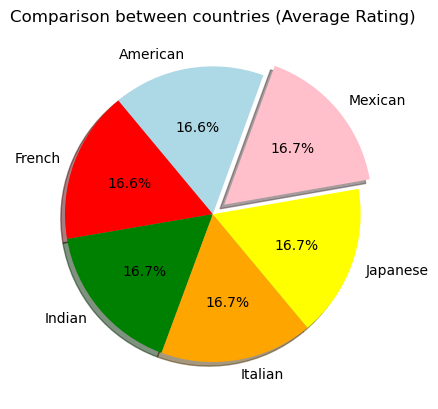

In [259]:
# Create a pie chart comparing average "Rating" by each countries
country_list = ["American", "French", "Indian", "Italian", "Japanese", "Mexican"]
colors = ["lightblue", "red", "green", "orange", "yellow", "pink"]
explode = (0, 0, 0, 0, 0, 0.1)
figure = rating

plt.pie(figure, labels = country_list, colors = colors, explode = explode, 
        shadow = True, autopct = '%.1f%%', startangle = 70)
plt.title("Comparison between countries (Average Rating)")

rating_pie_path = os.path.join("result_country", "avg_rating_pie_comparison.png")
plt.savefig(rating_pie_path)

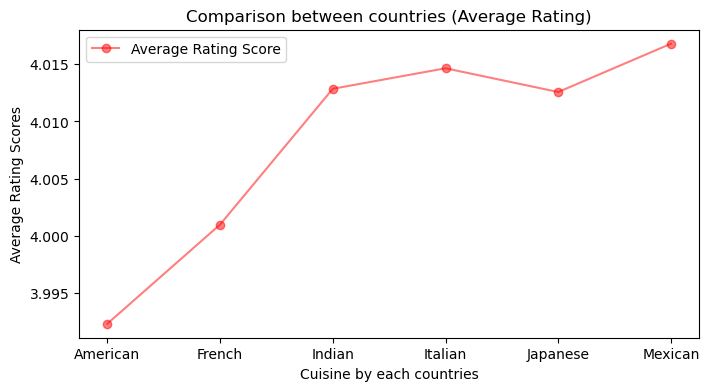

In [260]:
# Create a line graph comparing average "Rating" by each countries
plt.figure(figsize = (8, 4))
plt.plot(country_list, rating, marker = 'o', color = 'red', label = "Average Rating Score", alpha = 0.5)

plt.title("Comparison between countries (Average Rating)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Rating Scores")
plt.legend(loc = 'best')

rating_path = os.path.join("result_country", "avg_rating_line_comparison.png")
plt.savefig(rating_path)

3. Average "Service Quality Score" by each country's "Cuisine"

In [261]:
# Group with "Cuisine" by each countries with average "Service Quality Score"
group2 = restaurant_df.groupby(["Cuisine"])
group2 = group2[["Service Quality Score"]].mean()
group2

,Service Quality Score
Cuisine,
American,5.543291
French,5.468597
Indian,5.465888
Italian,5.429512
Japanese,5.641964
Mexican,5.509045


In [262]:
# Create a "Service Quality Score" list
service_quality_score = group2["Service Quality Score"].tolist()
service_quality_score

[5.543290960451977,
 5.468597348220516,
 5.465887509130752,
 5.4295116772823775,
 5.641964285714286,
 5.509045226130653]

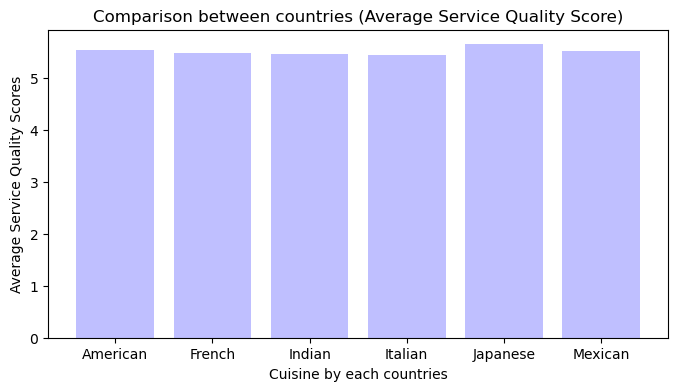

In [263]:
# Create a bar chart comparing average "Service Quality Score" by each countries
plt.figure(figsize = (8, 4))
plt.bar(country_list, service_quality_score, color = 'blue', alpha = 0.25)

plt.title("Comparison between countries (Average Service Quality Score)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Service Quality Scores")

service_q_score_bar_path = os.path.join("result_country", "avg_service_quality_bar_comparison.png")
plt.savefig(service_q_score_bar_path)

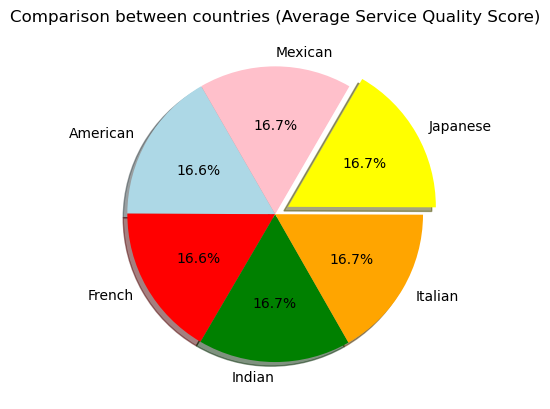

In [264]:
# Create a pie chart comparing average "Service Quality Score" by each countries
country_list = ["American", "French", "Indian", "Italian", "Japanese", "Mexican"]
colors = ["lightblue", "red", "green", "orange", "yellow", "pink"]
explode = (0, 0, 0, 0, 0.1, 0)
figure = rating

plt.pie(figure, labels = country_list, colors = colors, explode = explode, 
        shadow = True, autopct = '%.1f%%', startangle = 120)

plt.title("Comparison between countries (Average Service Quality Score)")

service_q_score_pie_path = os.path.join("result_country", "avg_service_quality_pie_comparison.png")
plt.savefig(service_q_score_pie_path)

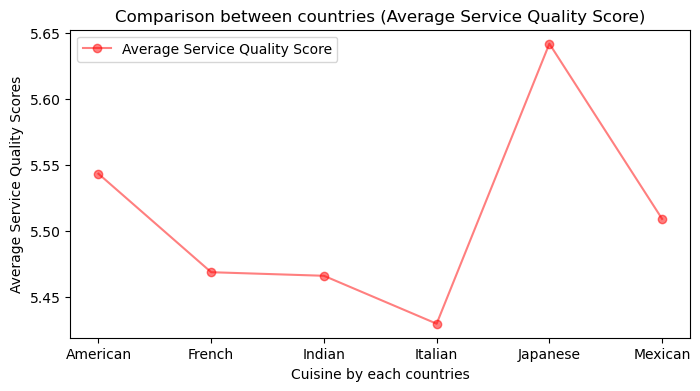

In [265]:
# Create a line graph comparing average "Service Quality Score" by each countries
plt.figure(figsize = (8, 4))
plt.plot(country_list, service_quality_score, marker = 'o', color = 'red', label = "Average Service Quality Score", alpha = 0.5)

plt.title("Comparison between countries (Average Service Quality Score)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Service Quality Scores")
plt.legend(loc = 'best')

service_q_score_line_path_ = os.path.join("result_country", "avg_service_quality_line_comparison.png")
plt.savefig(service_q_score_line_path_)

4. Average "Weekend Reservations", "Weekday Reservations", and "Weekend Reservations" by each country's "Cuisine"

In [266]:
# Group with "Cuisine" by each countries with average "Weekend Reservations" and "Weekday Reservations"
group3 = restaurant_df.groupby(["Cuisine"])
group3 = group3[["Weekend Reservations", "Weekday Reservations"]].mean()
group3

,Weekend Reservations,Weekday Reservations
Cuisine,,
American,29.832627,29.594633
French,29.450803,28.926029
Indian,29.733382,30.209642
Italian,29.654636,29.310686
Japanese,28.534970,27.842262
Mexican,29.707825,29.498205


In [267]:
# Create a "Weekend Reservations" list
weekend = group3["Weekend Reservations"].tolist()
weekend

[29.83262711864407,
 29.450802512212142,
 29.733382030679326,
 29.65463552724699,
 28.534970238095237,
 29.707824838478103]

In [268]:
# Create a "Weekday Reservations" list
weekday = group3["Weekday Reservations"].tolist()
weekday

[29.59463276836158,
 28.92602930914166,
 30.209642074506938,
 29.310686482661005,
 27.842261904761905,
 29.498205312275665]

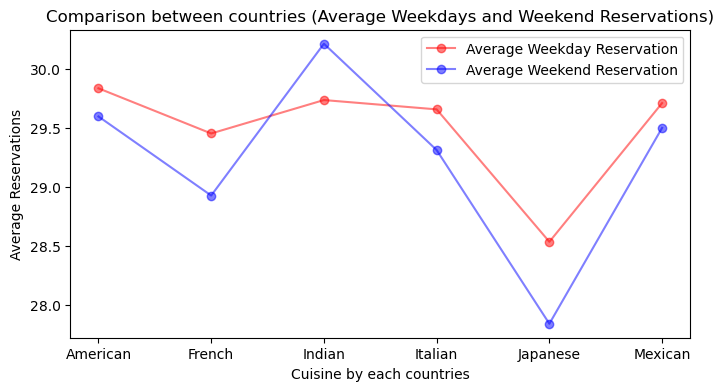

In [269]:
# Create a line graph comparing average "Weekend Reservations" and average "Weekday Reservations" by each countries
plt.figure(figsize = (8, 4))
plt.plot(country_list, weekend, marker = 'o', color = 'red', label = 'Average Weekday Reservation', alpha = 0.5)
plt.plot(country_list, weekday, marker = 'o', color = 'blue', label = 'Average Weekend Reservation', alpha = 0.5)

plt.title("Comparison between countries (Average Weekdays and Weekend Reservations)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Reservations")
plt.legend(loc = 'best')

weekend_weekday_path = os.path.join("result_country", "avg_weekend_weekday_line_comparison.png")
plt.savefig(weekend_weekday_path)

In [270]:
group3["Week Reservations"] = group3["Weekend Reservations"] + group3["Weekday Reservations"]
group3

,Weekend Reservations,Weekday Reservations,Week Reservations
Cuisine,,,
American,29.832627,29.594633,59.427260
French,29.450803,28.926029,58.376832
Indian,29.733382,30.209642,59.943024
Italian,29.654636,29.310686,58.965322
Japanese,28.534970,27.842262,56.377232
Mexican,29.707825,29.498205,59.206030


In [271]:
# Create a "Week Reservations" list
week = group3["Week Reservations"].tolist()
week

[59.42725988700565,
 58.376831821353804,
 59.94302410518627,
 58.96532200990799,
 56.37723214285714,
 59.20603015075377]

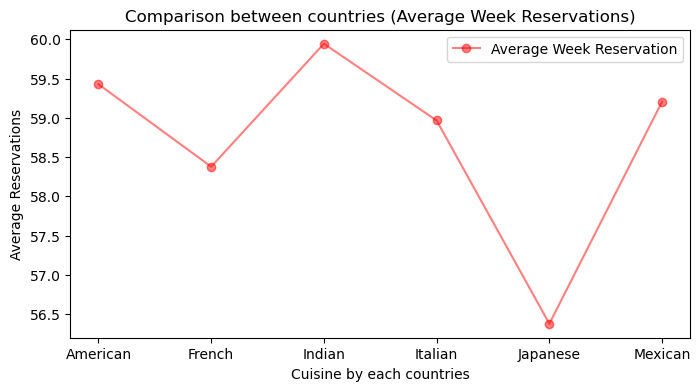

In [272]:
# Create a line graph comparing average "Week Reservations" by each countries
plt.figure(figsize = (8, 4))
plt.plot(country_list, week, marker = 'o', color = 'red', label = "Average Week Reservation", alpha = 0.5)

plt.title("Comparison between countries (Average Week Reservations)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Average Reservations")
plt.legend(loc = 'best')

week_path = os.path.join("result_country", "avg_week_line_comparison.png")
plt.savefig(week_path)

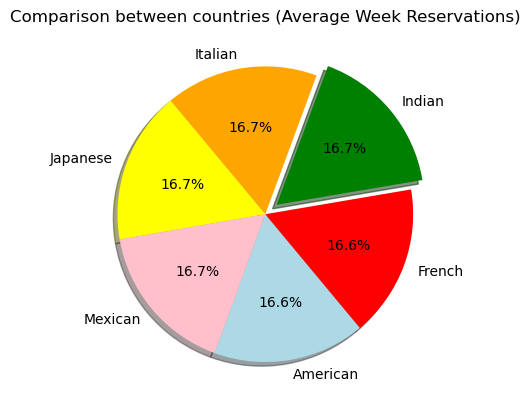

In [273]:
# Create a pie chart comparing average "Week Reservations" by each countries
country_list = ["American", "French", "Indian", "Italian", "Japanese", "Mexican"]
colors = ["lightblue", "red", "green", "orange", "yellow", "pink"]
explode = (0, 0, 0.1, 0, 0, 0)
figure = rating

plt.pie(figure, labels = country_list, colors = colors, explode = explode, 
        shadow = True, autopct = '%.1f%%', startangle = 250)

plt.title("Comparison between countries (Average Week Reservations)")

week_pie_path = os.path.join("result_country", "avg_week_pie_comparison.png")
plt.savefig(week_pie_path)

5. Average "Marketing Budget" by each country's "Cuisine"

In [274]:
# Group with "Cuisine" by each countries with average "Marketing Budget"
group4 = restaurant_df.groupby(["Cuisine"])
group4 = group4[["Marketing Budget"]].mean()
group4

,Marketing Budget
Cuisine,
American,3257.646893
French,3203.725750
Indian,3202.196494
Italian,3258.675867
Japanese,3195.410714
Mexican,3189.979899


In [275]:
# Create a "Marketing Budget" list
marketing_budget = group4["Marketing Budget"].tolist()
marketing_budget

[3257.646892655367,
 3203.7257501744593,
 3202.1964937910884,
 3258.675866949752,
 3195.410714285714,
 3189.9798994974876]

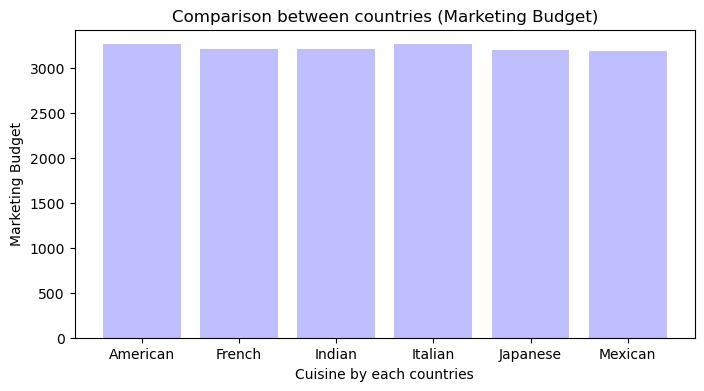

In [276]:
# Create a bar chart comparing average "Marketing Budget" by each countries
plt.figure(figsize = (8, 4))
plt.bar(country_list, marketing_budget, color = 'blue', alpha = 0.25)

plt.title("Comparison between countries (Marketing Budget)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Marketing Budget")

marketing_budget_bar_path = os.path.join("result_country", "avg_marketing_budget_bar_comparison.png")
plt.savefig(marketing_budget_bar_path)

In [277]:
# Check the maximum value
max(marketing_budget)

3258.675866949752

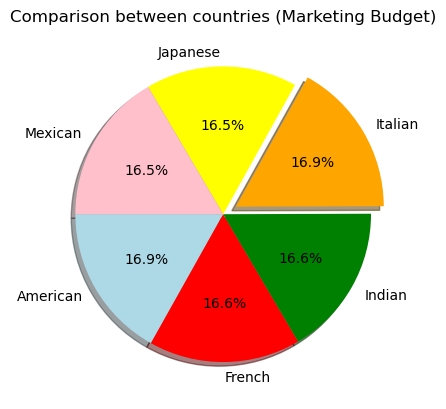

In [278]:
# Create a pie chart comparing average "Marketing Budget" by each countries
country_list = ["American", "French", "Indian", "Italian", "Japanese", "Mexican"]
colors = ["lightblue", "red", "green", "orange", "yellow", "pink"]
explode = (0, 0, 0, 0.1, 0, 0)
figure = marketing_budget

plt.pie(figure, labels = country_list, colors = colors, explode = explode, 
        shadow = True, autopct = '%.1f%%', startangle = 180)

plt.title("Comparison between countries (Marketing Budget)")

marketing_budget_pie_path = os.path.join("result_country", "avg_marketing_budget_pie_comparison.png")
plt.savefig(marketing_budget_pie_path)

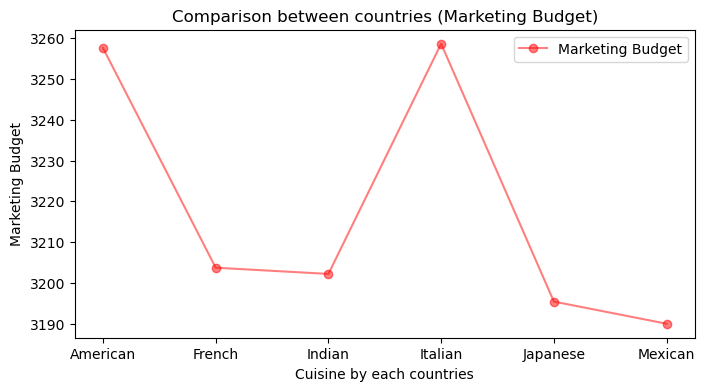

In [279]:
# Create a line graph comparing average "Marketing Budget" by each countries
plt.figure(figsize = (8, 4))
plt.plot(country_list, marketing_budget, marker = 'o', color = 'red', label = "Marketing Budget", alpha = 0.5)

plt.title("Comparison between countries (Marketing Budget)")
plt.xlabel("Cuisine by each countries")
plt.ylabel("Marketing Budget")
plt.legend(loc = 'best')

marketing_budget_line_path_ = os.path.join("result_country", "avg_marketing_budget_line_comparison.png")
plt.savefig(marketing_budget_line_path_)

6. Relationship between "Marketing Budget" and "Social Media Followers"

In [280]:
# Load a dataset
restaurant_df[["Marketing Budget", "Social Media Followers"]].head()

,Marketing Budget,Social Media Followers
0,2224,23406
1,4416,42741
2,2796,37285
3,1167,15214
4,3639,40171


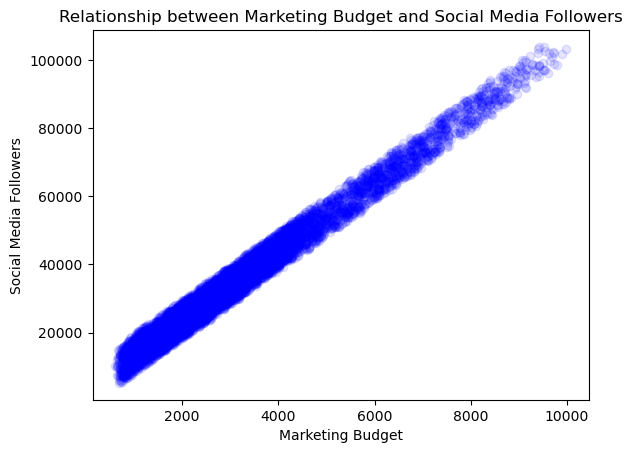

In [281]:
# Create a scatter plot to see relationship between "Marketing Budget" and "Social Media Followers"
plt.scatter(restaurant_df["Marketing Budget"], restaurant_df["Social Media Followers"], color = 'blue', alpha = 0.1)

plt.title("Relationship between Marketing Budget and Social Media Followers")
plt.xlabel("Marketing Budget")
plt.ylabel("Social Media Followers")

marketing_followers_scatter_path = os.path.join("result_country", "marketing_followers_scatter.png")
plt.savefig(marketing_followers_scatter_path)

7. Relationship between "Rating" and "Revenue"

In [282]:
# Load a dataset
restaurant_df[["Rating", "Revenue"]].head()

,Rating,Revenue
0,4.0,638945.52
1,3.2,490207.83
2,4.7,541368.62
3,4.4,404556.80
4,4.9,1491046.35


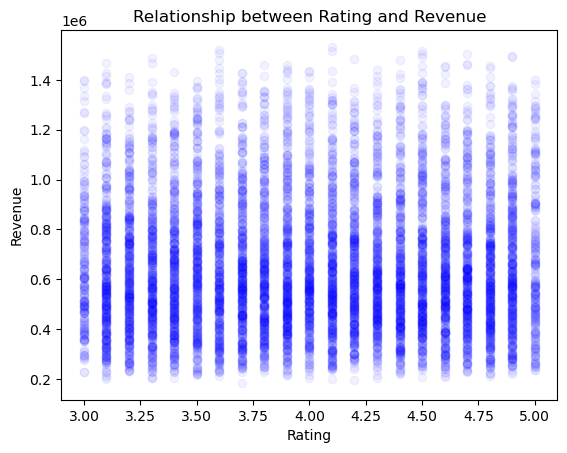

In [283]:
# Create a scatter plot to see relationship between "Rating" and "Revenue"
plt.scatter(restaurant_df["Rating"], restaurant_df["Revenue"], color = 'blue', alpha = 0.05)

plt.title("Relationship between Rating and Revenue")
plt.xlabel("Rating")
plt.ylabel("Revenue")

rating_revenue_scatter_path = os.path.join("result_country", "rating_revenue_scatter.png")
plt.savefig(rating_revenue_scatter_path)

8. Relationship between "Marketing Budget" and "Revenue"

In [284]:
# Load a dataset
restaurant_df[["Marketing Budget", "Revenue"]].head()

,Marketing Budget,Revenue
0,2224,638945.52
1,4416,490207.83
2,2796,541368.62
3,1167,404556.80
4,3639,1491046.35


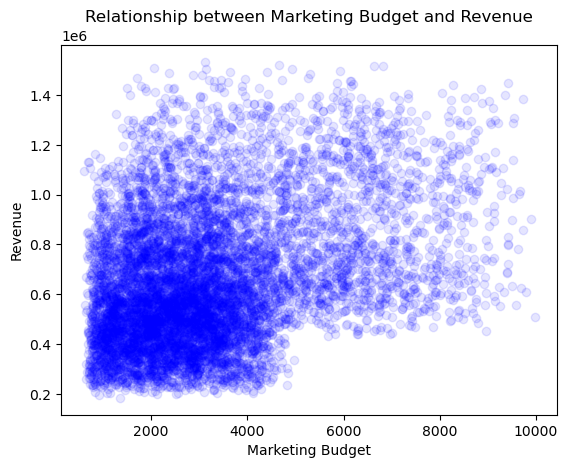

In [285]:
# Create a scatter plot to see relationship between "Marketing Budget" and "Revenue"
plt.scatter(restaurant_df["Marketing Budget"], restaurant_df["Revenue"], color = 'blue', alpha = 0.1)

plt.title("Relationship between Marketing Budget and Revenue")
plt.xlabel("Marketing Budget")
plt.ylabel("Revenue")

marketing_revenue_scatter_path = os.path.join("result_country", "marketing_revenue_scatter.png")
plt.savefig(marketing_revenue_scatter_path)

9. Relationship between "Rating" and "Service Quality Score"

In [286]:
# Load a dataset
restaurant_df[["Rating", "Service Quality Score"]].head()

,Rating,Service Quality Score
0,4.0,7.0
1,3.2,3.4
2,4.7,6.7
3,4.4,2.8
4,4.9,2.1


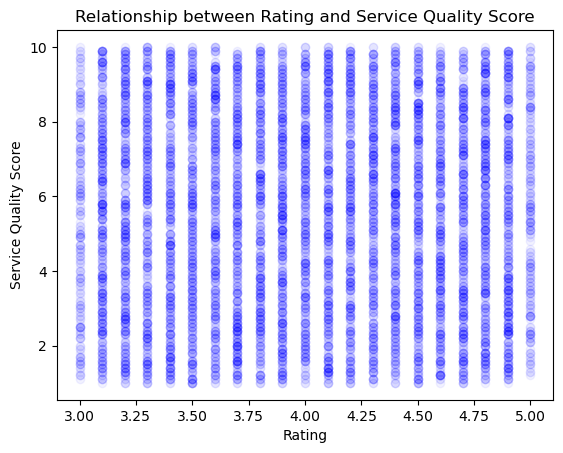

In [287]:
# Create a scatter plot to see relationship between "Rating" and "Service Quality Score"
plt.scatter(restaurant_df["Rating"], restaurant_df["Service Quality Score"], color = 'blue', alpha = 0.05)

plt.title("Relationship between Rating and Service Quality Score")
plt.xlabel("Rating")
plt.ylabel("Service Quality Score")

rating_service_score_scatter_path = os.path.join("result_country", "rating_service_score_scatter.png")
plt.savefig(rating_service_score_scatter_path)

10. Relationship between "Rating" and "Ambience Score"

In [288]:
# Load a dataset
restaurant_df[["Rating", "Ambience Score"]].head()

,Rating,Ambience Score
0,4.0,1.3
1,3.2,2.6
2,4.7,5.3
3,4.4,4.6
4,4.9,8.6


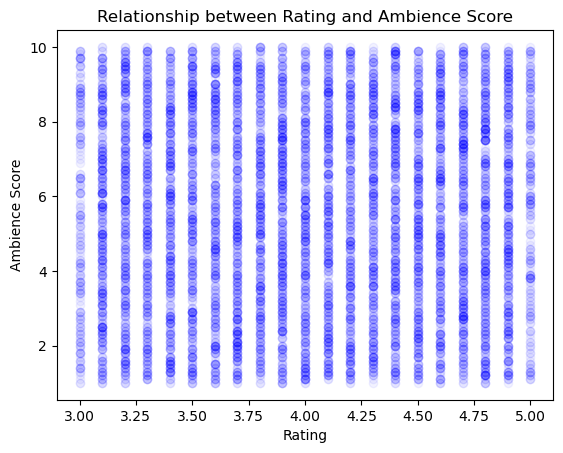

In [289]:
# Create a scatter plot to see relationship between "Rating" and "Ambience Score"
plt.scatter(restaurant_df["Rating"], restaurant_df["Ambience Score"], color = 'blue', alpha = 0.05)

plt.title("Relationship between Rating and Ambience Score")
plt.xlabel("Rating")
plt.ylabel("Ambience Score")

rating_ambience_score_scatter_path = os.path.join("result_country", "rating_ambience_score_scatter.png")
plt.savefig(rating_ambience_score_scatter_path)

11. Relationship between "Social Media Followers" and "Revenue"

In [290]:
# Load a dataset
restaurant_df[["Social Media Followers", "Revenue"]].head()

,Social Media Followers,Revenue
0,23406,638945.52
1,42741,490207.83
2,37285,541368.62
3,15214,404556.80
4,40171,1491046.35


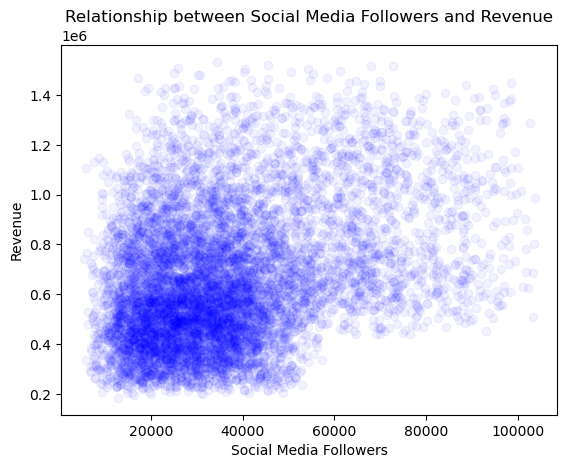

In [291]:
# Create a scatter plot to see relationship between "Social Media Followers" and "Revenue"
plt.scatter(restaurant_df["Social Media Followers"], restaurant_df["Revenue"], color = 'blue', alpha = 0.05)

plt.title("Relationship between Social Media Followers and Revenue")
plt.xlabel("Social Media Followers")
plt.ylabel("Revenue")

follower_revenue_scatter_path = os.path.join("result_country", "follower_revenue_scatter.png")
plt.savefig(follower_revenue_scatter_path)

12. Relationship between "Service Quality Score" and "Revenue"

In [292]:
# Load a dataset
restaurant_df[["Service Quality Score", "Revenue"]].head()

,Service Quality Score,Revenue
0,7.0,638945.52
1,3.4,490207.83
2,6.7,541368.62
3,2.8,404556.80
4,2.1,1491046.35


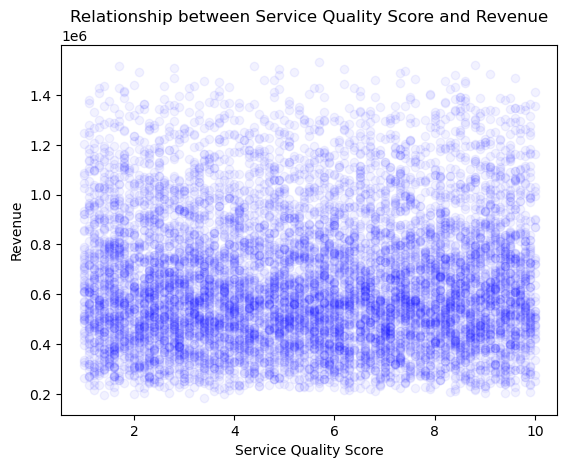

In [293]:
# Create a scatter plot to see relationship between "Service Quality Score" and "Revenue"
plt.scatter(restaurant_df["Service Quality Score"], restaurant_df["Revenue"], color = 'blue', alpha = 0.05)

plt.title("Relationship between Service Quality Score and Revenue")
plt.xlabel("Service Quality Score")
plt.ylabel("Revenue")

service_score_revenue_scatter_path = os.path.join("result_country", "service_score_revenue_scatter.png")
plt.savefig(service_score_revenue_scatter_path)

13. Relationship between "Ambience Score" and "Revenue"

In [294]:
# Load a dataset
restaurant_df[["Ambience Score", "Revenue"]].head()

,Ambience Score,Revenue
0,1.3,638945.52
1,2.6,490207.83
2,5.3,541368.62
3,4.6,404556.80
4,8.6,1491046.35


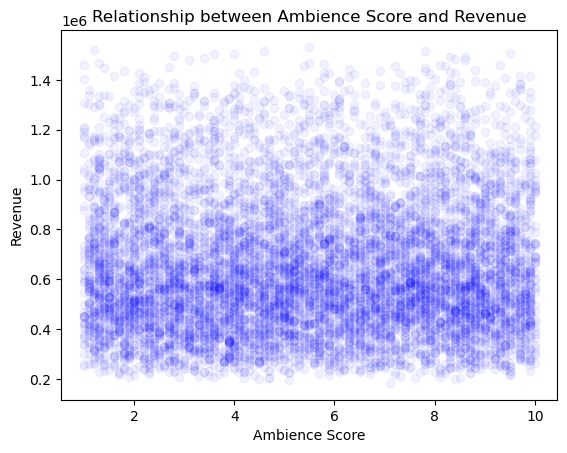

In [295]:
# Create a scatter plot to see relationship between "Ambience Score" and "Revenue"
plt.scatter(restaurant_df["Ambience Score"], restaurant_df["Revenue"], color = 'blue', alpha = 0.05)

plt.title("Relationship between Ambience Score and Revenue")
plt.xlabel("Ambience Score")
plt.ylabel("Revenue")

ambience_score_revenue_scatter_path = os.path.join("result_country", "ambience_score_revenue_scatter.png")
plt.savefig(ambience_score_revenue_scatter_path)

14. Relationship between "Average Meal Price" and "Revenue"

In [296]:
# Load a dataset
restaurant_df[["Average Meal Price", "Revenue"]].head()

,Average Meal Price,Revenue
0,73.98,638945.52
1,28.11,490207.83
2,48.29,541368.62
3,51.55,404556.80
4,75.98,1491046.35


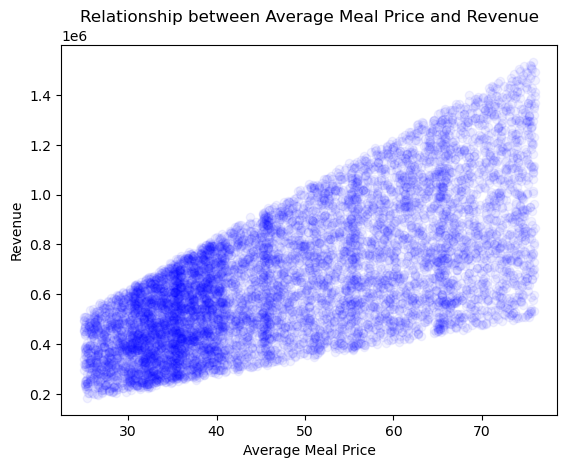

In [297]:
# Create a scatter plot to see relationship between "Average Meal Price" and "Revenue"
plt.scatter(restaurant_df["Average Meal Price"], restaurant_df["Revenue"], color = 'blue', alpha = 0.05)

plt.title("Relationship between Average Meal Price and Revenue")
plt.xlabel("Average Meal Price")
plt.ylabel("Revenue")

price_revenue_scatter_path = os.path.join("result_country", "price_revenue_scatter.png")
plt.savefig(price_revenue_scatter_path)